## QuasarNET Performance vs training set size
#### Plot to show performance of QuasarNET as a function of the size of the training set
xxx

In [1]:
import astropy
import copy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from quasarnet.io import read_truth
from qn_analysis import plot, strategy, utils, variables

In [2]:
figsize = (12,6.5)
fontsize = 18

temp_output_loc = '/global/cfs/projectdirs/desi/users/jfarr/QuasarNET_paper/'

plt.rc('font', size=fontsize)

### Load the results from the different QN models

In [3]:
## QN parameters
n_detect = 1
c_th = 0.8
include_c_qn = True
common_specids = True

In [4]:
f_truth = variables.OUTDIR+'/data/truth/truth_dr12q.fits'
truth = read_truth([f_truth])

In [5]:
data = {}

## Load the QN 90% data.
f_qn = variables.OUTDIR+'/results/qn_results/qn_performance_vs_training_set_size/qn_90pc.fits'
data['QN_90'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

"""## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet.fits'
data['QN5_90'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test.fits'
data['QN5_test_90'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl.fits'
data['QN5_test_mkl_90'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_0.1.fits'
data['QN50_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_0.1_again.fits'
data['QN50_again_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_0.1_1.fits'
data['QN50_1_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_0.1.fits'
data['QN50_test_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_0.1_again.fits'
data['QN50_test_again_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_0.1_1.fits'
data['QN50_test_1_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl_0.1.fits'
data['QN50_test_mkl_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl_0.1_again.fits'
data['QN50_test_mkl_again_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl_0.1_1.fits'
data['QN50_test_mkl_1_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)"""

## Load the QN 10% data.
f_qn = variables.OUTDIR+'/results/qn_results/qn_performance_vs_training_set_size/qn_10pc.fits'
data['QN_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN TF2 10% data.
#f_qn = variables.OUTDIR+'/results/qn_results/qn_tf2_test.fits'
#data['QNtf2_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN 5% data.
f_qn = variables.OUTDIR+'/results/qn_results/qn_performance_vs_training_set_size/qn_5pc.fits'
data['QN_5'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN 2.5% data.
#f_qn = variables.OUTDIR+'/results/qn_results/qn_performance_vs_training_set_size/qn_2.5pc.fits'
#data['QN_2.5'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN 1% data.
#f_qn = variables.OUTDIR+'/results/qn_results/qn_performance_vs_training_set_size/qn_1pc.fits'
#data['QN_1'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

### Find the set of common spectra, and reduce all data to that set
This finds which spectra* are common to all datasets, and removes any that are not common. It then matches the data from each classifier to each spectrum, and produces a single data table.

\* using spec_id = plate$\times$1000000000 + mjd$\times$10000 + fiber for BOSS, or spec_id = targetid for DESI (to be updated)

In [6]:
data_table = utils.reduce_data_to_table(data,truth,include_c_qn=include_c_qn,common_specids=False)
data_table[:5]

SPEC_ID,OBJ_ID,ZCONF_PERSON,Z_VI,CLASS_VI,ISQSO_VI,Z_QN_90,CLASS_QN_90,ISQSO_QN_90,C_QN_90 [6],Z_QN_10,CLASS_QN_10,ISQSO_QN_10,C_QN_10 [6],Z_QN_5,CLASS_QN_5,ISQSO_QN_5,C_QN_5 [6]
int64,int64,int64,float64,str8,bool,float64,str8,bool,float64,float64,str8,bool,float64,float64,str8,bool,float64
7166566020362,20589337,2,1.616,QSO,True,--,--,--,-- .. --,2.207,NONQSO,False,0.017 .. 0.000,1.613,NONQSO,False,0.000 .. 0.000
7166566020367,20603085,2,2.070,QSO,True,--,--,--,-- .. --,2.082,QSO,True,1.000 .. 0.000,2.065,QSO,True,1.000 .. 0.000
7169566280047,20935261,2,0.000,STAR,False,--,--,--,-- .. --,2.076,NONQSO,False,0.000 .. 0.000,2.934,NONQSO,False,0.000 .. 0.000
7169566280046,20935742,2,0.000,STAR,False,--,--,--,-- .. --,1.431,NONQSO,False,0.000 .. 0.000,1.455,NONQSO,False,0.000 .. 0.000
7169566280052,20936956,2,0.000,STAR,False,--,--,--,-- .. --,2.110,NONQSO,False,0.000 .. 0.000,1.098,NONQSO,False,0.000 .. 0.000


In [7]:
# Include only objects in the data table that have the highest confidence level, and VI redshift not equal to -1.
w = (data_table['ZCONF_PERSON']==2) & (data_table['Z_VI']>-1)
data_table = data_table[w]
len(data_table)

547363

### Compare the performance of the different model/data combos.
xxx

In [11]:
ls = {'QN_90': '-',
      'QN_10': '--',
      'QN_5': '-.',
      'QN_2.5': '-.',
      'QN_1': ':',

      'QN5_90': '-',
      'QN5_test_90': '--',
      'QN5_test_mkl_90': '-.',

      'QN50_10': '-',
      'QN50_again_10': '-',
      'QN50_1_10': '-',
      'QN50_test_10': '--',
      'QN50_test_again_10': '--',
      'QN50_test_1_10': '--',
      'QN50_test_mkl_10': '-.',
      'QN50_test_mkl_again_10': '-.',
      'QN50_test_mkl_1_10': '-.',
     }

In [12]:
## Define general parameter values.
dv_max = 6000.
nspec_sdr12q = 627751

# confidence thresholds.
c_th_min = 0.0
c_th_max = 1.0
n_int = 100
c_th_values = np.linspace(c_th_min,c_th_max,n_int)

In [13]:
## Define strategies.
strategies = {}

for s in data.keys():
    
    p = float(s.split('_')[-1])/100
    name = 'Model trained on\n{:.0%} DR12 Superset\n({:,} spectra)'.format(p,int(p*nspec_sdr12q))
    if type(data_table['ISQSO_{}'.format(s)])==astropy.table.column.MaskedColumn:
        filt = (~data_table['ISQSO_{}'.format(s)].data.mask)
    else:
        filt = np.ones(len(data_table)).astype(bool)
    
    # QN definitions.
    n_detect = 1
    strat = strategy.Strategy('qn',cf_kwargs={'qn_name':s})
    preds = [strat.predict(data_table,filter=filt,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
    strategies[s] = {'isqso': [pred.isqso for pred in preds],
                     'z': [pred.z for pred in preds],
                     'c_th': c_th_values,
                     'n': name, 
                     'ls': ls[s]}

/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/numpy/ma/core.py:4036: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  check = compare(sdata, odata)
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/qn_analysis/plot.py:34: RuntimeWarning: invalid value encountered in long_scalars
  pur = pur_num/pur_denom
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/qn_analysis/plot.py:266: RuntimeWarning: invalid value encountered in greater
  ind = np.where(pur>com)[0][0]
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/qn_analysis/plot.py:286: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  axs[dv_panel].hist(dv,bins=dv_bins,histtype='step',ls=strategies[s]['ls'],color=utils.colours['C2'],normed=norm_dvhist)


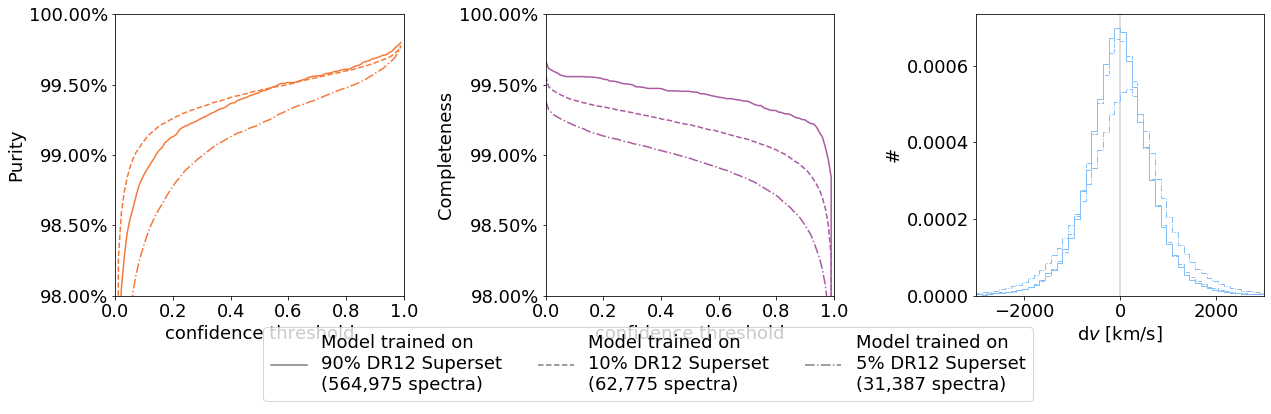

In [14]:
filename = '../plots/qn_performance_vs_training_set_size_3panel.pdf'

#plot.plot_qn_model_compare_3panel(data_table,strategies,filename=filename,
#                             dv_max=dv_max,figsize=(18,6),
#                             ymin=0.97,ymax=1.)

plot.plot_qn_model_compare(data_table,strategies,filename=filename,
                           dv_max=dv_max,nydec=2,figsize=(18,6),
                           ymin=0.98,ymax=1.,verbose=False,npanel=3,
                           norm_dvhist=True)

plt.show()

/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/numpy/ma/core.py:4036: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  check = compare(sdata, odata)
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/qn_analysis/plot.py:34: RuntimeWarning: invalid value encountered in long_scalars
  pur = pur_num/pur_denom
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/qn_analysis/plot.py:266: RuntimeWarning: invalid value encountered in greater
  ind = np.where(pur>com)[0][0]
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/qn_analysis/plot.py:286: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  axs[dv_panel].hist(dv,bins=dv_bins,histtype='step',ls=strategies[s]['ls'],color=utils.colours['C2'],normed=norm_dvhist)
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/

Strategy QN_90:
Crossover occurs at:
cth: [0.4848 0.4949 0.5051 0.5152]
pur: [0.9943 0.9944 0.9945 0.9946]
com: [0.9945 0.9945 0.9945 0.9945]
QN_90 has median velocity error -34.168 and standard deviation 758.351

Strategy QN_10:
Crossover occurs at:
cth: [0.2424 0.2525 0.2626 0.2727]
pur: [0.993  0.9931 0.9932 0.9932]
com: [0.9932 0.9932 0.9931 0.9931]
QN_10 has median velocity error -21.156 and standard deviation 785.558

Strategy QN_5:
Crossover occurs at:
cth: [0.3232 0.3333 0.3434 0.3535]
pur: [0.9903 0.9905 0.9906 0.9908]
com: [0.9907 0.9907 0.9906 0.9906]
QN_5 has median velocity error 69.973 and standard deviation 971.390



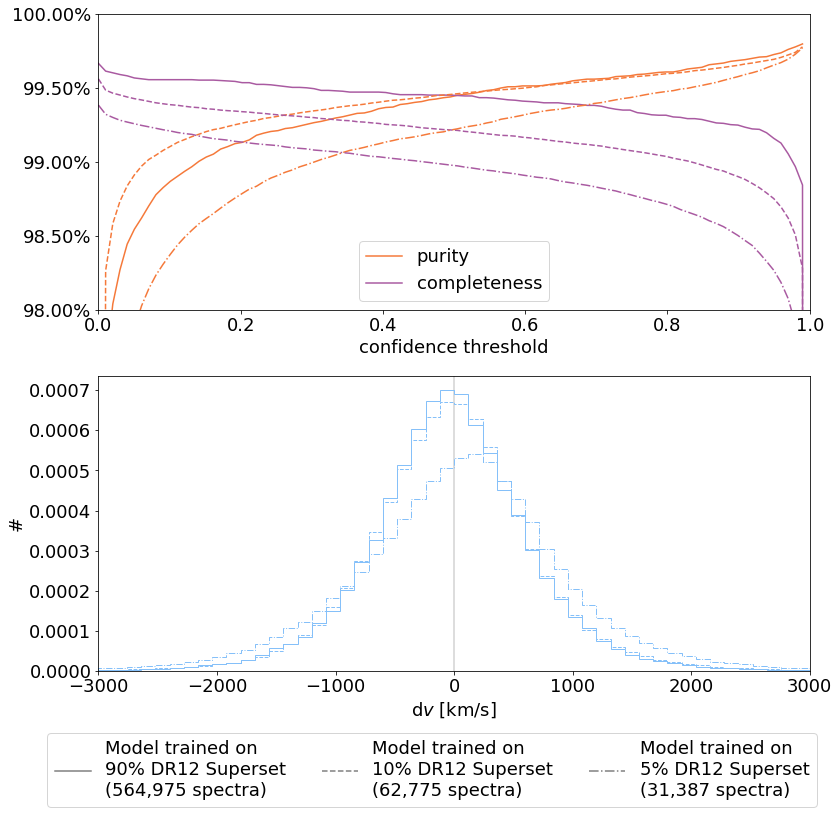

In [15]:
filename = '../plots/qn_performance_vs_training_set_size_2panel.pdf'

plot.plot_qn_model_compare(data_table,strategies,filename=filename,
                           dv_max=dv_max,nydec=2,figsize=(12,12),
                           ymin=0.98,ymax=1.,verbose=True,npanel=2,
                           norm_dvhist=True)
plt.show()